In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


/project/amp/juliob/MiniConda/envs/adf_v0.07/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [44]:
nz=30
U=np.zeros(nz)+15.
N=np.zeros(nz)+0.01
rho=np.zeros(nz)+1.
delta=np.zeros(nz)
tau=np.zeros(nz)
zo=np.linspace(20_000,0,num=nz)
U=np.where( zo>10_100., 11., U )

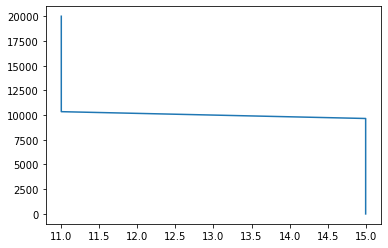

In [45]:
plt.plot(U,zo)

In [58]:
# Set L_h to a huge number
L_h=50_000.
l=nz-1
delta[l] = 1000.
tau[l]   = rho[l]*U[l]*N[l]*(delta[l]**2)/L_h
for l in np.arange(start=nz-2,stop=-1,step=-1):
    tau_w     = tau[l+1]
    delta_w   = np.sqrt( tau_w / (rho[l]*U[l]*N[l]/L_h) )
    delta_sat = U[l]/N[l]
    delta[l]  = np.amin( [delta_sat, delta_w] )
    tau[l]    = rho[l]*U[l]*N[l]*(delta[l]**2)/L_h

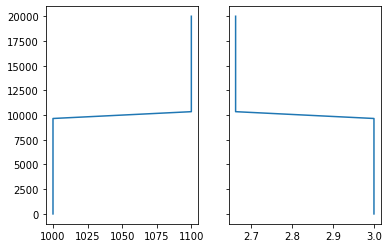

In [59]:
fig,ax=plt.subplots(1,2,sharey=True)
ax[0].plot(delta,zo)
ax[1].plot(tau,zo)

In [60]:
L_h=1.
l=nz-1
delta[l] = 1000.
tau[l]   = rho[l]*U[l]*N[l]*(delta[l]**2)/L_h
for l in np.arange(start=nz-2,stop=-1,step=-1):
    tau_w     = tau[l+1]
    delta_w   = np.sqrt( tau_w / (rho[l]*U[l]*N[l]/L_h) )
    delta_sat = U[l]/N[l]
    delta[l]  = np.amin( [delta_sat, delta_w] )
    tau[l]    = rho[l]*U[l]*N[l]*(delta[l]**2)/L_h

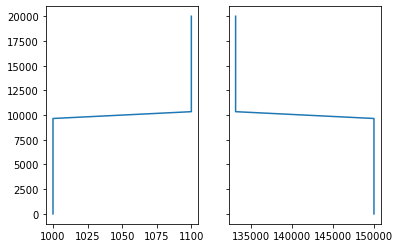

In [61]:
fig,ax=plt.subplots(1,2,sharey=True)
ax[0].plot(delta,zo)
ax[1].plot(tau,zo)